# Visualizations in Python

An advantage of Python is that you can perform the entire data analytics lifecycle in one tool. We have already seen how we can clean and manipulate dates, in this workbook we will look at visualising it.

There are several libraries available that specialise in visualisations, but the one we will focus on is `matplotlib`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is a basic library for vizualisations, you can read more through its <a href='https://matplotlib.org/'>documentation</a>.

For this demonstration we will be using an inbuilt library called the wine dataset which contains information about 178 Italian wines. Each wine can be sorted into one of 3 categories.

In [2]:
# The wine dataset is stored within a library called sklearn
from sklearn import datasets

# The dataset is stored as a dictionary
wine = datasets.load_wine()

wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# To turn it into a dataframe we need to extract the data and column names from the dictionary
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# We can also add another column which tells us which type of wine (red=0, white=1)
wine_df['category'] = wine['target']

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Barchart

Let's start by building a basic bar chart. In this example we will compare the average magnesium for each of three categories.

In [4]:
# First we will need to group the data together:

grouped = wine_df.groupby('category').mean()
grouped

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
category,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


To make a bar chart we need to supply two pieces of information - the x axis labels (the dataframe indices) and what we are using for the bar heights (magnesium level.

<BarContainer object of 3 artists>

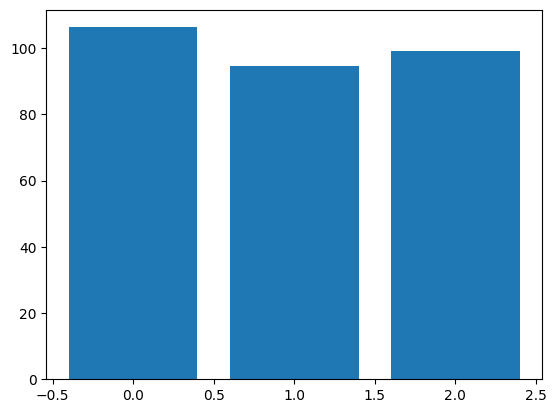

In [5]:
plt.bar(grouped.index, grouped['magnesium'])

And that is how we build a bar chart, but let's look at how we can tidy it up a bit. First, we can add either a `;` to the end of our code or `plt.show()` to remove the metadata.

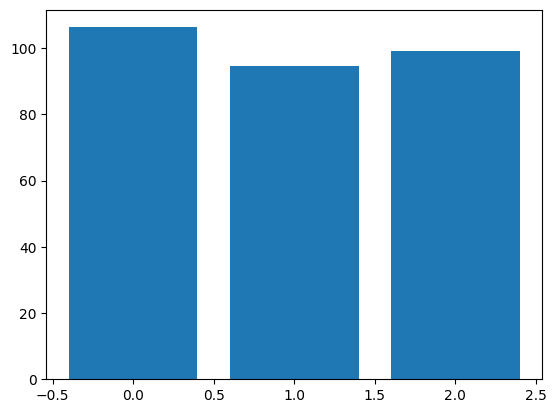

In [6]:
plt.bar(grouped.index, grouped['magnesium']);

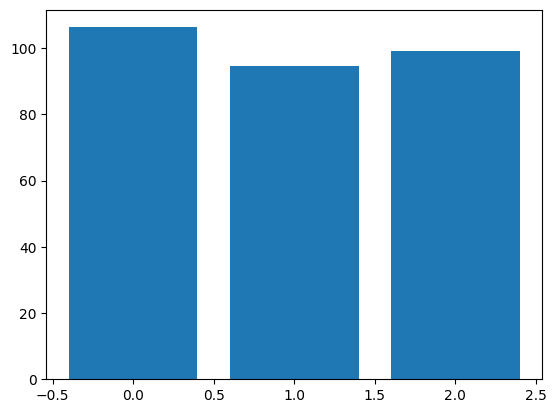

In [7]:
plt.bar(grouped.index, grouped['magnesium'])
plt.show()

What about changing the color of the bars? We just add color in as a parameter.

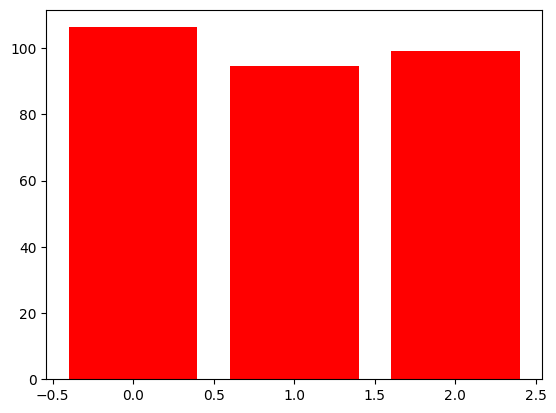

In [8]:
plt.bar(grouped.index, grouped['magnesium'], color='red')
plt.show()

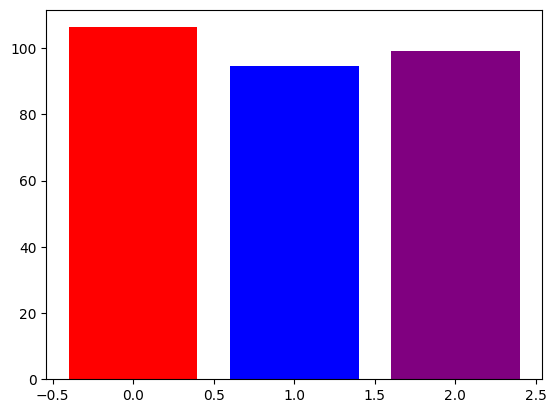

In [9]:
plt.bar(grouped.index, grouped['magnesium'], color=['red','blue','purple'])
plt.show()

A useful function to use in `plt.subplots()` which allows us to work with the actual data plot. This function returns two outputs- information about the figures and information about the axes.

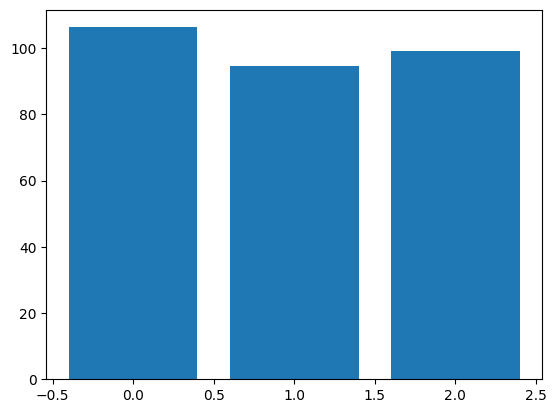

In [10]:
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped['magnesium'])
plt.show()

This allows us to add labels and titles to the chart as well as change the size (`figsize`)

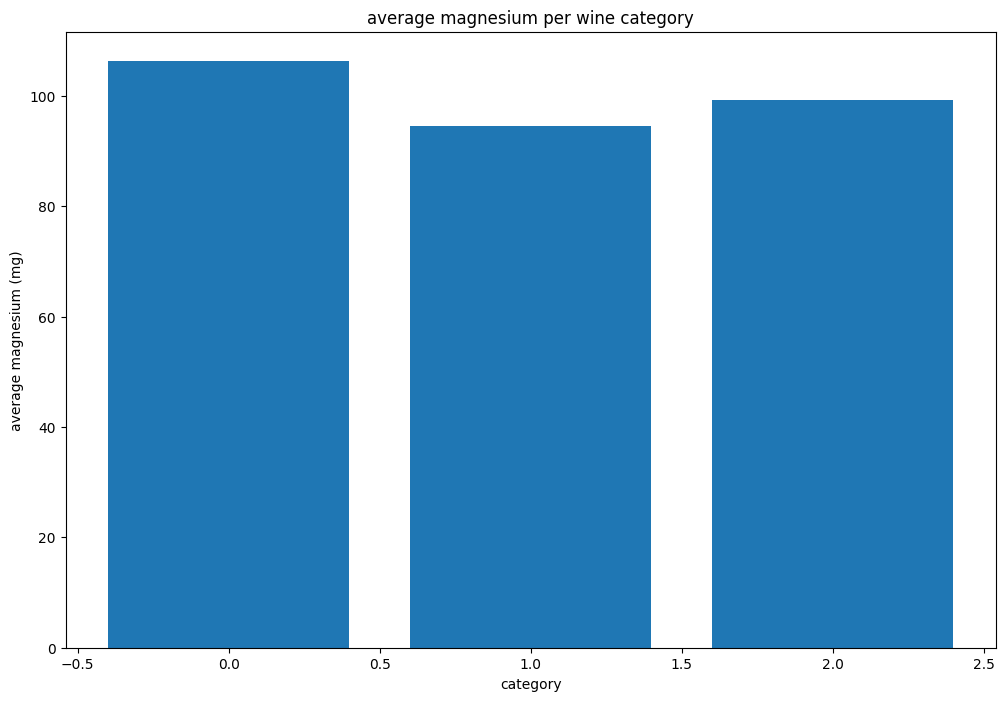

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(grouped.index, grouped['magnesium'])
ax.set_xlabel('category')
ax.set_ylabel('average magnesium (mg)')
ax.set_title('average magnesium per wine category')
plt.show()

Using subplots allows us to add multiple charts to a visualization, so if we wanted to compare ash as well:

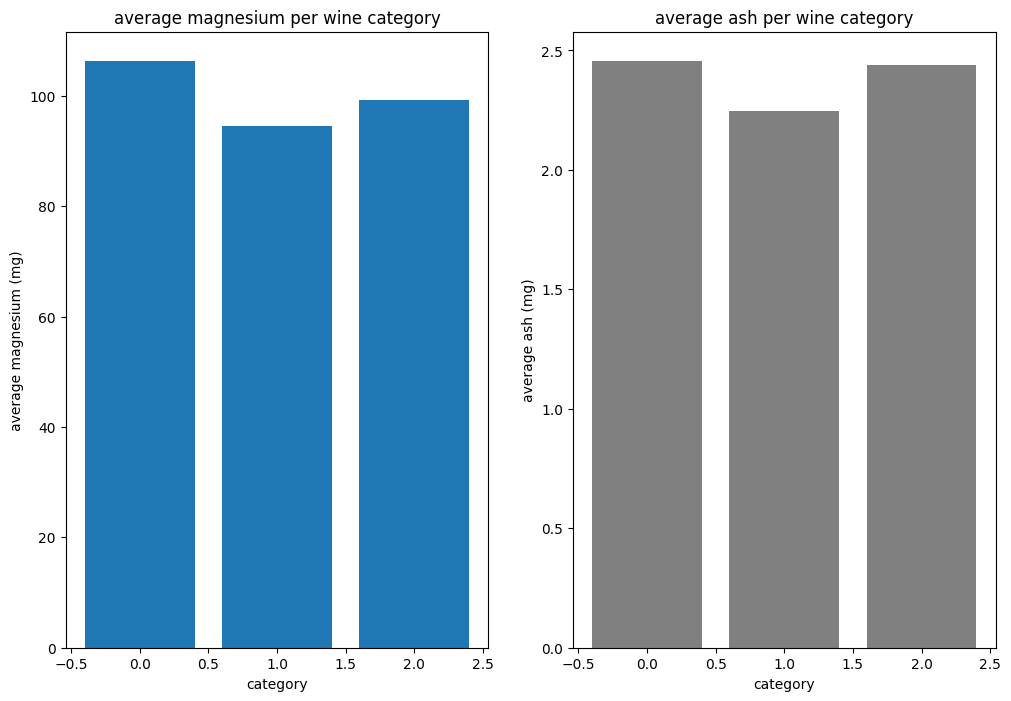

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

ax[0].bar(grouped.index, grouped['magnesium'])
ax[0].set_xlabel('category')
ax[0].set_ylabel('average magnesium (mg)')
ax[0].set_title('average magnesium per wine category')
ax[1].bar(grouped.index, grouped['ash'], color='grey')
ax[1].set_xlabel('category')
ax[1].set_ylabel('average ash (mg)')
ax[1].set_title('average ash per wine category')
plt.show()

Note, that when using multiple plots you need to use indices to specifiy which plot you are adding to. If you have multiple rows and columns you will need to enter the indice as a coordinate.

### Practice

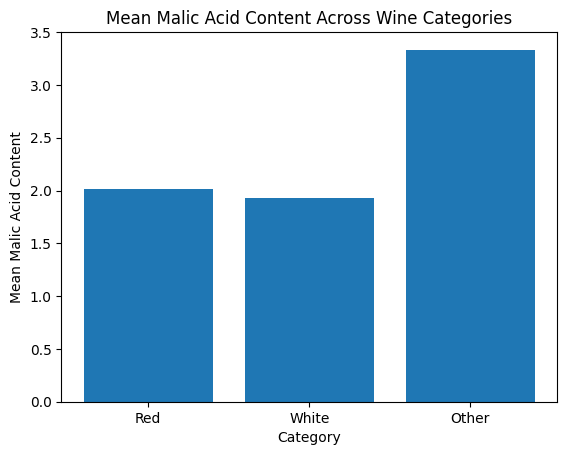

In [15]:
# Produce a bar chart that compares the average malic_acid for each category of wine. 

#A:

# First let's fix this nonsense of using numbers to indicate "red" or "white"...
categories = {
    0: "Red",
    1: "White",
    2: "Other",
}

wine_data = grouped
wine_data["category_name"] = wine_data.index.map(categories)

# Now let's make the chart...

fig, ax = plt.subplots()
ax.bar(wine_data["category_name"], wine_data["malic_acid"])
ax.set_xlabel("Category")
ax.set_ylabel("Mean Malic Acid Content")
ax.set_title("Mean Malic Acid Content Across Wine Categories")
plt.show()


## Boxplots

Another useful visualization is the boxplot which allows us to compare import statistics from a dataset, namely:

* The highest and lowest values that are not outliers
* The median value
* The upper and lower quartiles (25% and 75%)
* Outliers (matplotlib uses the calculation 1.5 * IQR above or below the upper or lower quartile to identify outliers)

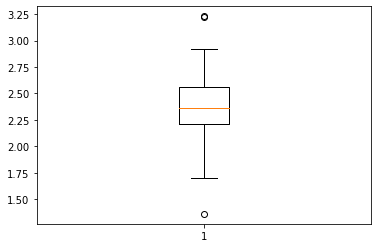

In [14]:
plt.boxplot(wine_df['ash'])
plt.show()

Again we can format the vizualisation using paramaters

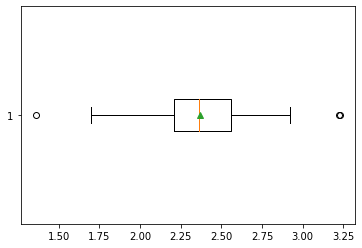

In [15]:
plt.boxplot(wine_df['ash'], showmeans=True, vert=False)
plt.show()

We can also add in other parameters so we can compare:

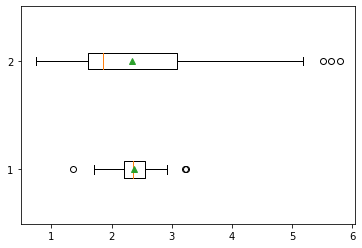

In [16]:
plt.boxplot([wine_df['ash'], wine_df['malic_acid']], showmeans=True, vert=False)
plt.show()

We can also use boxplots to compare categories within a dataset:

### Practice

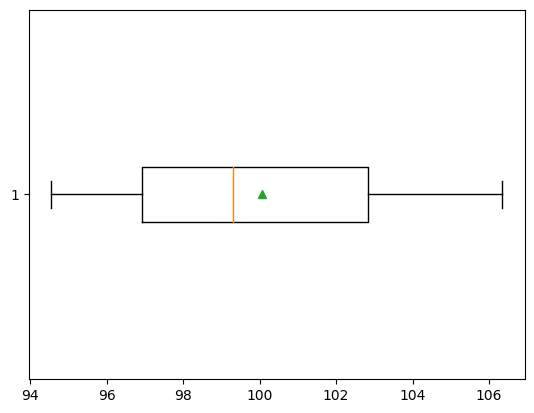

In [16]:
# Build a boxplot that will allow you to inspect the quartiles for magnesium level for all wines.

#A
plt.boxplot(wine_data["magnesium"], showmeans=True, vert=False)
plt.show()

## Prepare for workshop

In the workshop we will be introducing you to some more visualizations, to prepare for this read the documentation for <a href='https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html'>scatter plots</a> and <a href='https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html'>histograms</a> and have a go at building the following visualizations:

<ol>
    <li> Build a scatter plot that shows the relationship between ash and malic_acid for all wines </li>
    <li> Build a histogram that shows the distribution of malic_acid across te dataset </li>
</ol>

For both visualizations, investigate and experiment with the parameters to find out how you can format the charts.

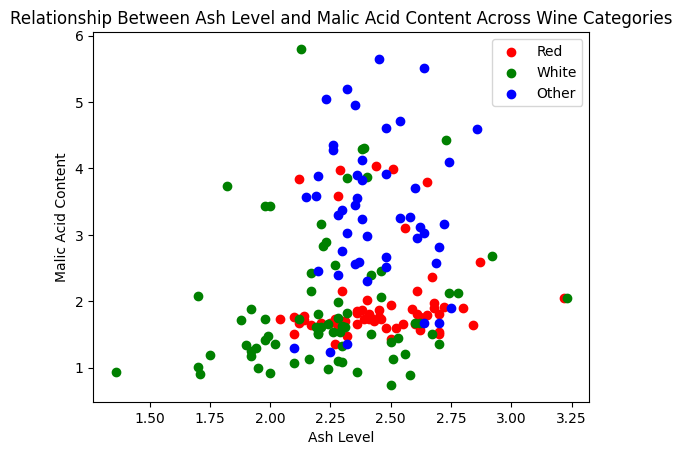

In [33]:
wine_df["category_name"] = wine_df["category"].map(categories)

dfs: list[tuple[str, pd.DataFrame]] = [ (x, wine_df[wine_df["category_name"] == x])
                                        for x in wine_df["category_name"].unique() ]

colours = {
    "Red": "red",
    "White": "green",
    "Other": "blue",
}

fig, ax = plt.subplots()

for (category, df) in dfs:
    ax.scatter(df["ash"], df["malic_acid"], c=colours[category], label=category)

ax.set_xlabel("Ash Level")
ax.set_ylabel("Malic Acid Content")
ax.set_title("Relationship Between Ash Level and Malic Acid Content Across Wine Categories")
ax.legend()
plt.show()



Click here to check scatter plot

<p style=color:white>
# To build a basic scatter plot you can use the following code:
plt.plot(wine_df['magnesium'], wine_df['color_intensity'], '.')
plt.show()
# Note, the independent variable comes first, then dependent variable. To stop the points joining together, we use '.'.
# We can also change the mark size and shape.
</p>

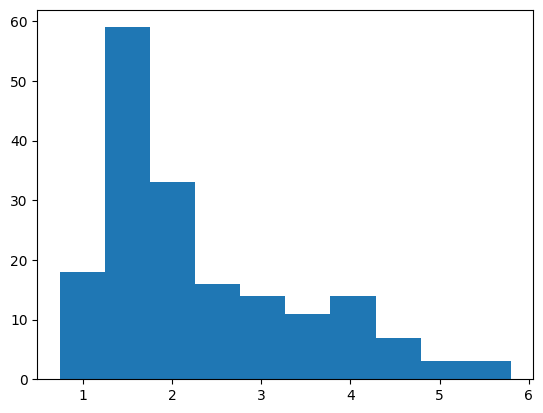

array([1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1.64, 1.35, 2.16,
       1.48, 1.73, 1.81, 1.92, 1.57, 1.59, 3.1 , 1.63, 3.8 , 1.86, 1.6 ,
       2.05, 1.77, 1.72, 1.9 , 1.68, 1.5 , 1.66, 1.83, 1.53, 1.8 , 1.65,
       3.99, 3.84, 1.89, 3.98, 4.04, 3.59, 2.02, 1.75, 1.67, 1.7 , 1.97,
       1.43, 0.94, 1.1 , 1.36, 1.25, 1.13, 1.45, 1.21, 1.01, 1.17, 1.19,
       1.61, 1.51, 1.09, 1.88, 0.9 , 2.89, 0.99, 3.87, 0.92, 3.86, 0.89,
       0.98, 2.06, 1.33, 2.83, 1.99, 1.52, 2.12, 1.41, 1.07, 3.17, 2.08,
       1.34, 2.45, 2.55, 1.29, 3.74, 2.43, 2.68, 0.74, 1.39, 1.47, 3.43,
       2.4 , 4.43, 5.8 , 4.31, 2.13, 4.3 , 2.99, 2.31, 3.55, 1.24, 2.46,
       4.72, 5.51, 2.96, 2.81, 2.56, 4.95, 3.88, 3.57, 5.04, 4.61, 3.24,
       3.9 , 3.12, 2.67, 3.3 , 5.19, 4.12, 3.03, 3.83, 3.26, 3.27, 3.45,
       2.76, 4.36, 3.7 , 3.37, 2.58, 4.6 , 2.39, 2.51, 5.65, 3.91, 4.28,
       4.1 ])

In [36]:
fig, ax = plt.subplots()

ax.hist(wine_df["malic_acid"])
plt.show()

Click here to check histogram

<p style=color:white>
#To build a basic scatter plot you can use the following code:
plt.hist(wine_df['ash'])
plt.show()
</p>